In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('database.csv')
data.head()

,Jogador,Time,#,Nação,Pos.,Idade,Min.,Gols,Assis.,PB,...,GCA,Cmp,Att,Cmp%,PrgP,Conduções,PrgC,Tent,Suc,Data
0,Éder,Criciúma,23,ITA,FW,37-150,57.0,0,0,0,...,0.0,12.0,16.0,"75,0",3.0,17.0,0.0,0.0,0.0,2024-04-13
1,Yannick Bolasie,Criciúma,11,COD,FW,34-325,33.0,0,0,0,...,0.0,4.0,5.0,"80,0",0.0,6.0,3.0,5.0,3.0,2024-04-13
2,Renato Kayser,Criciúma,79,BRA,FW,28-056,85.0,1,0,0,...,0.0,10.0,15.0,"66,7",4.0,14.0,0.0,1.0,0.0,2024-04-13
3,Arthur,Criciúma,35,BRA,FW,31-303,5.0,0,0,0,...,0.0,5.0,6.0,"83,3",1.0,2.0,0.0,1.0,1.0,2024-04-13
4,Marquinhos Gabriel,Criciúma,10,BRA,AM,33-267,77.0,0,0,0,...,1.0,22.0,24.0,"91,7",3.0,24.0,2.0,7.0,5.0,2024-04-13


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11682 entries, 0 to 11681
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Jogador    11682 non-null  object 
 1   Time       11682 non-null  object 
 2   #          11682 non-null  int64  
 3   Nação      11676 non-null  object 
 4   Pos.       11682 non-null  object 
 5   Idade      11676 non-null  object 
 6   Min.       11681 non-null  float64
 7   Gols       11682 non-null  int64  
 8   Assis.     11682 non-null  int64  
 9   PB         11682 non-null  int64  
 10  PT         11682 non-null  int64  
 11  TC         11682 non-null  int64  
 12  CaG        11682 non-null  int64  
 13  CrtsA      11682 non-null  int64  
 14  CrtV       11682 non-null  int64  
 15  Contatos   11681 non-null  float64
 16  Div        11681 non-null  float64
 17  Crts       11682 non-null  int64  
 18  Bloqueios  11681 non-null  float64
 19  xG         11681 non-null  float64
 20  npxG  

**OS DADOS:**

| **Índice** | **Variável**   | **Descrição**                                                                 |
|------------|----------------|-------------------------------------------------------------------------------|
| 0          | **Jogador**    | Nome do jogador.                                                              |
| 1          | **Time**       | Nome do time em que o jogador atua.                                          |
| 2          | **#**          | Número de identificação do jogador no dataset.                                |
| 3          | **Nação**      | País de origem do jogador.                                                   |
| 4          | **Pos.**       | Posição em que o jogador atua (ex: atacante, meio-campista, defensor).      |
| 5          | **Idade**      | Idade do jogador, geralmente em anos.                                        |
| 6          | **Min.**       | Minutos jogados na temporada ou em partidas específicas.                     |
| 7          | **Gols**       | Número total de gols marcados pelo jogador.                                   |
| 8          | **Assis.**     | Número de assistências feitas pelo jogador.                                   |
| 9          | **PB**         | Passes bem-sucedidos (ou outra métrica específica, dependendo do contexto).  |
| 10         | **PT**         | Passes tentados.                                                             |
| 11         | **TC**         | Tentativas de cruzamento.                                                    |
| 12         | **CaG**        | Chances criadas.                                                             |
| 13         | **CrtsA**      | Cortes realizados (ou interceptações).                                       |
| 14         | **CrtV**       | Cortes vencidos (ou desarmes bem-sucedidos).                                 |
| 15         | **Contatos**   | Número de contatos com a bola durante o jogo.                                |
| 16         | **Div**        | Divisões de bola (ou tackles).                                               |
| 17         | **Crts**       | Total de cortes realizados.                                                  |
| 18         | **Bloqueios**  | Número de bloqueios feitos pelo jogador.                                      |
| 19         | **xG**         | Expected Goals (gols esperados), uma métrica que estima a probabilidade de um gol. |
| 20         | **npxG**       | Non-Penalty Expected Goals (gols esperados sem penalidades).                |
| 21         | **xAG**        | Expected Assists (assistências esperadas).                                   |
| 22         | **SCA**        | Shot-Creating Actions (ações que criam chutes).                             |
| 23         | **GCA**        | Goal-Creating Actions (ações que criam gols).                               |
| 24         | **Cmp**        | Passes completados.                                                          |
| 25         | **Att**        | Tentativas de passes.                                                        |
| 26         | **Cmp%**       | Percentual de passes completados.                                            |
| 27         | **PrgP**       | Progressive Passes (passes progressivos que avançam o jogo).                |
| 28         | **Conduções**  | Número de vezes que o jogador conduziu a bola.                              |
| 29         | **PrgC**       | Progressive Carries (conduções progressivas).                               |
| 30         | **Tent**       | Tentativas de dribles ou ações ofensivas.                                    |
| 31         | **Suc**        | Sucessos em tentativas (ex: dribles bem-sucedidos).                         |
| 32         | **Data**       | Data em que os dados foram coletados ou atualizados.                        |




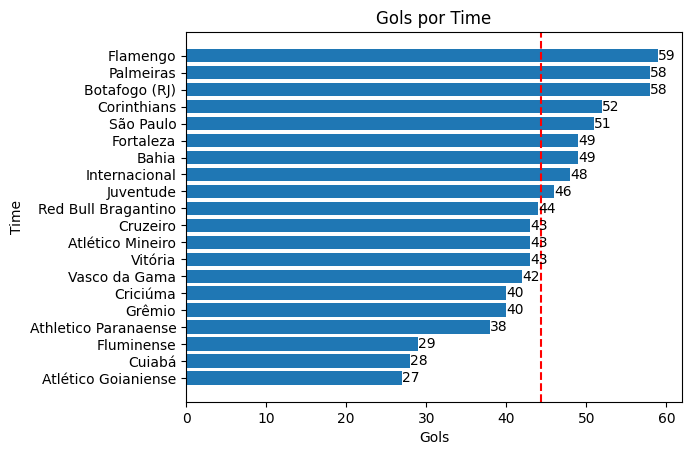

In [44]:

grouped_data = data.groupby('Time')['Gols'].sum()

sorted_data = grouped_data.sort_values(ascending=True)


plt.barh(sorted_data.index, sorted_data.values)
plt.xlabel('Gols')
plt.ylabel('Time')
plt.title('Gols por Time')
for index, value in enumerate(sorted_data.values):
    plt.text(value, index, str(value), color='black', ha='left', va='center')
    # Calculate and plot the average line
avg_goals = sorted_data.values.mean()
plt.axvline(x=avg_goals, color='red', linestyle='--', label='Média de Gols')


plt.show()

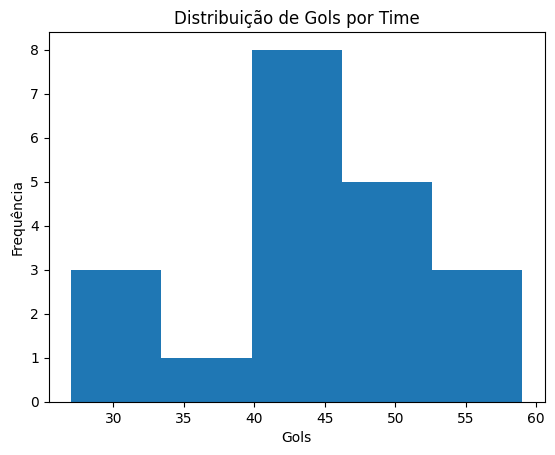

In [45]:
plt.hist(grouped_data.values, bins=5)
plt.xlabel('Gols')
plt.ylabel('Frequência')
plt.title('Distribuição de Gols por Time')
plt.show()

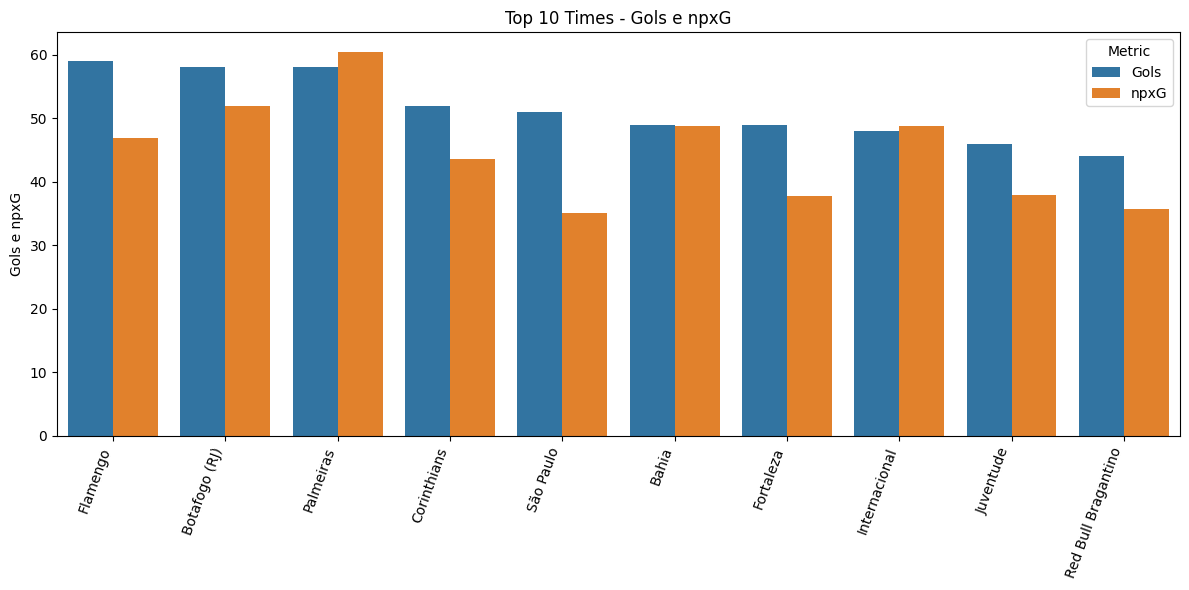

In [53]:
grouped_data = data.groupby('Time').agg({'Gols': 'sum', 'npxG': 'sum'})

# Ordena os times pelos gols e pega os 10 maiores
top_10_gols = grouped_data.sort_values('Gols', ascending=False).head(10)

# Reordena os dados para o gráfico
top_10_data = top_10_gols[['Gols', 'npxG']].stack().reset_index()
top_10_data.columns = ['Time', 'Metric', 'Value']

# Cria o gráfico de barras lado a lado com barras empilhadas
plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura
sns.barplot(x='Time', y='Value', hue='Metric', data=top_10_data)
plt.xticks(rotation=70, ha='right')  # Rotaciona os rótulos do eixo x
plt.xlabel('')
plt.ylabel('Gols e npxG')
plt.title('Top 10 Times - Gols e npxG')
plt.tight_layout()
plt.show()

In [ ]:
dataAssist = data.groupby(['Jogador']).agg({
    'PrgP':'sum',
    'xAG': 'sum'
})

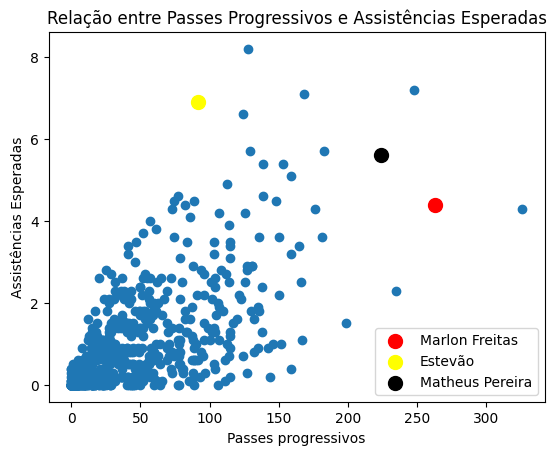

In [ ]:

estxag_prg = dataAssist.loc['Estevão', 'PrgP']
estxag = dataAssist.loc['Estevão', 'xAG']
freitas_prg = dataAssist.loc['Marlon Freitas', 'PrgP']
freitas_xag = dataAssist.loc['Marlon Freitas', 'xAG']
pereira_prg = dataAssist.loc['Matheus Pereira', 'PrgP']
pereira_xag = dataAssist.loc['Matheus Pereira', 'xAG']


# Destacar os pontos no gráfico

plt.scatter(dataAssist['PrgP'],dataAssist['xAG'])
plt.scatter(freitas_prg, freitas_xag, color='red', s=100, label='Marlon Freitas')
plt.scatter(estxag_prg, estxag, color='yellow', s=100, label='Estevão')
plt.scatter(pereira_prg, pereira_xag, color='black', s=100, label='Matheus Pereira')
plt.ylabel('Assistências Esperadas')
plt.xlabel('Passes progressivos')
plt.title('Relação entre Passes Progressivos e Assistências Esperadas')
plt.legend()  # Mostrar legenda com os nomes dos jogadores
plt.show()

In [24]:

data['Cmp%'] = data['Cmp%'].fillna(0)



In [25]:


data['Cmp%'] = data['Cmp%'].astype(str).str.replace(',', '.').astype(float)

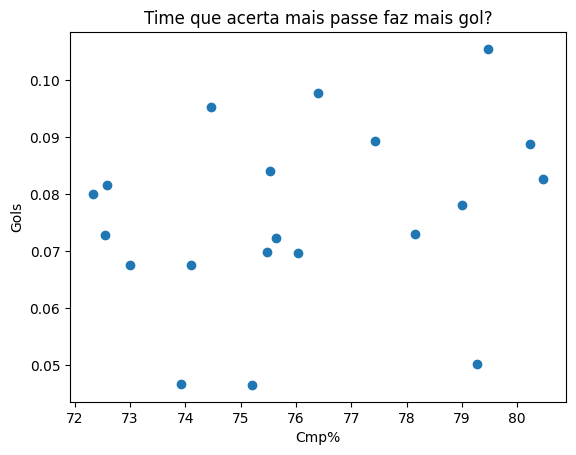

In [40]:
datacmpgols = data.groupby('Time').agg({'Cmp%': 'mean', 'Gols': 'mean'})

plt.scatter(datacmpgols['Cmp%'], datacmpgols['Gols'])
plt.ylabel('Gols')
plt.xlabel('Cmp%')
plt.title('Time que acerta mais passe faz mais gol?')
plt.show()

In [46]:


print(f"A correlação entre passes completados e gols é de {np.corrcoef(datacmpgols['Cmp%'], datacmpgols['Gols'])[0, 1]:.2f}")


A correlação entre passes completados e gols é de 0.25
